20


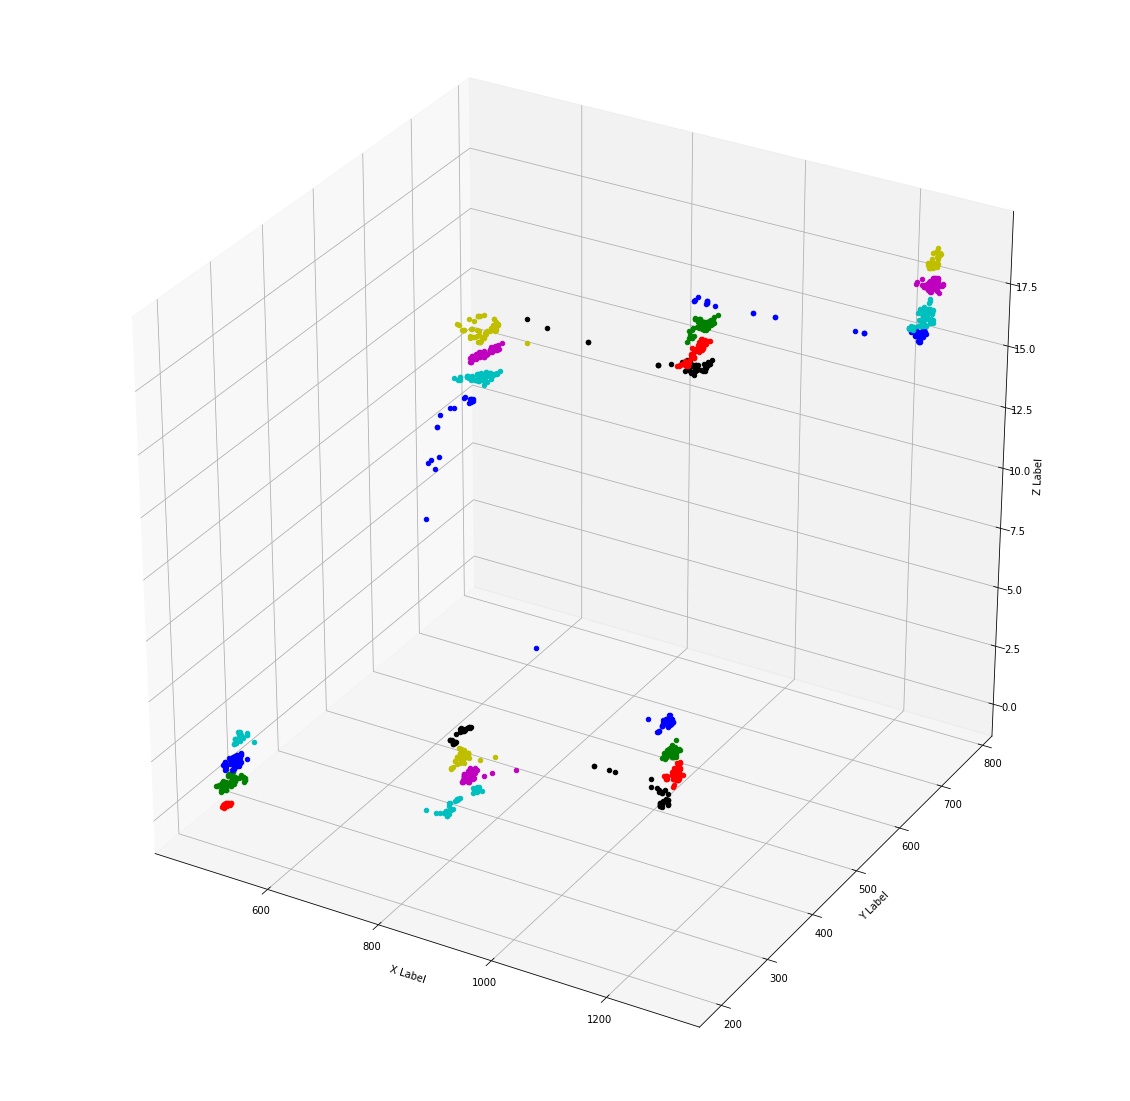

In [29]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#IDT Thhold
dis_threshold = 130
dur_threshold = 3

dataname='ev20-1-14.csv'
img = plt.imread("ev2020c.png")

df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

temp_tc =df['timecount']
df['timecount']=df['timecount']-df['timecount'][0]
df = df.drop(columns=['no', 'userid', 'timestamp'])

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
current_t = -1
cmap = ['r','g','b','c','m','y','k']
asc = -1
count=0
for index, row in df.iterrows():
    if current_t!=row['timecount']:
        current_t=row['timecount']
        asc=(asc+1)%7
        count+=1
    ax.scatter(row['x'], row['y'], row['timecount'], c=cmap[asc], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
print(count)


In [30]:
#ece k.t.
import numpy as np
import pandas as pd
import sys
import gaze as g
import csv
import time
import datetime
                            
df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

data = np.array(df)
user_ids = np.unique(data[:,g.user_id])

for u in user_ids:
    for q in range(1,2):
        sub_data = data
        sub2d = np.asarray(sub_data).reshape(len(sub_data),6) #this is a numpy array
        centroidsX, centroidsY, time0, tDif, fixList, fixations = g.idt(sub2d, dis_threshold, dur_threshold)

Tdata = {'X':centroidsX,'Y':centroidsY, 'Time':tDif}

print("raw fixations:")
print(fixations)
for _f in range(1, len(fixations)):
    _revIdx = len(fixations) - _f
    fixations[_revIdx] -= fixations[_revIdx-1]
print("post-processed fixations:")
print(fixations)

print()
print()
#print(len(fixList[1]))
print()

# Create DataFrame
df_IDT = pd.DataFrame(Tdata)
print(df_IDT)
print()
print(fixations)
print()
print("FIX CLUSTER LEN : " + str(len(df_IDT)))


raw fixations:
[163, 346, 538, 544, 739, 829, 933, 1124]
post-processed fixations:
[163, 183, 192, 6, 195, 90, 104, 191]



             X           Y   Time
0   480.657117  221.117156  163.0
1   890.820023  228.199681  182.0
2  1251.888371  216.669475  191.0
3   541.974302  566.898885    5.0
4   498.441486  723.451113  194.0
5   895.824889  713.295734   89.0
6   922.596030  697.329277  103.0
7  1271.002335  744.835289  190.0

[163, 183, 192, 6, 195, 90, 104, 191]

FIX CLUSTER LEN : 8


[array([[480.65711695, 221.1171565 , 163.        ]]), array([[890.82002344, 228.19968123, 182.        ]]), array([[1251.88837118,  216.66947549,  191.        ]]), array([[541.974302  , 566.89888483,   5.        ]]), array([[498.44148555, 723.45111316, 194.        ]]), array([[895.82488938, 713.29573438,  89.        ]]), array([[922.59602982, 697.32927727, 103.        ]]), array([[1271.00233515,  744.83528887,  190.        ]])]
1
[0]
2
[1]
3
[2]
4
[3]
5
[4]
6
[5]
7
[6]
8
[7]


'_count = 1\n_idx = 0\nfor i in range(0, len(Tdata[\'X\'])):\n    _tmpres = []\n    _tmpres.append(str(int(_idx))+"/"+str(float(Tdata[\'X\'][_idx]))+"/"+str(float(Tdata[\'Y\'][_idx])))\n    _tmpres="/".join(_tmpres)\n    save_csv.append(_tmpres)\n    counts.append(fixations[_idx])\n    _idx+=1\n    \n#print(save_csv)'

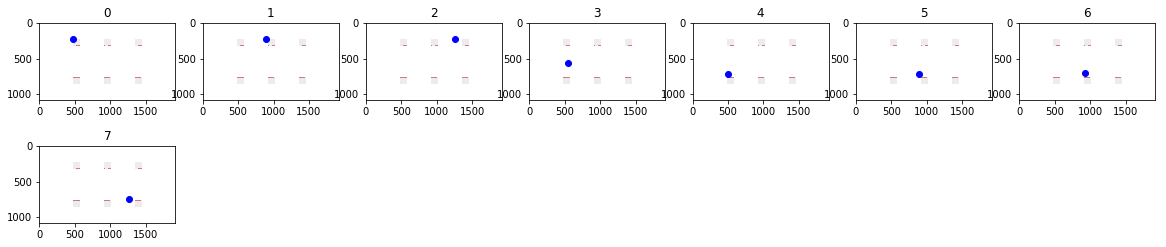

In [31]:
n_clusters = len(df_IDT)

clusters = []

_fidxrclu = 0
for _fpi in range(0, n_clusters):
    fpts = []
    fpts.append(df_IDT['X'][_fpi])
    fpts.append(df_IDT['Y'][_fpi])
    fpts.append(df_IDT['Time'][_fpi])
    clusters.append(array([fpts]))
    
print(clusters)

save_csv=[]
counts = []

fig = plt.figure(figsize=(20, 20))
fig_sub = []
fig_sub_count=0
IDT_IDX = []

for i in range(1,len(clusters)+1):
    fig_sub.append(fig.add_subplot(9,7,i))
    fig_sub[i-1].title.set_text(i-1)
    fig_sub[i-1].set_xlim([0, 1920])
    fig_sub[i-1].set_ylim([1080, 0])
    fig_sub[i-1].imshow(img, extent=[0, 1920, 1080, 0])
    
for i in range(1,len(clusters)+1):
    fig_sub_count+=1
    tmpres=[]
    print(i)
    for j in clusters[i-1]:
        fig_sub[fig_sub_count-1].scatter(j[0], j[1], c='b', marker='o')
        #tmpres.append(str(int(j[2]/other))+"/"+str(int(j[1]))+"/"+str(int(j[2])))
        tmpres.append(int(df_IDT[(df_IDT['X']==j[0])&(df_IDT['Y']==j[1])&(df_IDT['Time']==j[2])].index[0]))
        print(tmpres)
    IDT_IDX.append(tmpres)
#print(IDT_IDX)

'''_count = 1
_idx = 0
for i in range(0, len(Tdata['X'])):
    _tmpres = []
    _tmpres.append(str(int(_idx))+"/"+str(float(Tdata['X'][_idx]))+"/"+str(float(Tdata['Y'][_idx])))
    _tmpres="/".join(_tmpres)
    save_csv.append(_tmpres)
    counts.append(fixations[_idx])
    _idx+=1
    
#print(save_csv)'''

In [32]:
save_csv=[]
counts = []
sub2d = []
sub2d = np.asarray(data).reshape(len(data),6)

_ffindex = 0
for CLUSTER_IDX in IDT_IDX:
    res=[]
    count=0
    for FIX_IDX in CLUSTER_IDX:
        for RAW_IDX in fixList[FIX_IDX]:
            res.append(str(sub2d[_ffindex,0])+"/"+str(sub2d[_ffindex,4])+"/"+str(sub2d[_ffindex,5]))
            _ffindex+=1
            count+=1
    res="/".join(res)
    save_csv.append(res)
    counts.append(count)
print(len(save_csv))

'''maxd = max(counts)
print(maxd)
for i in range(len(counts)):
    counts[i]=counts[i]/maxd
d = {'data': save_csv, 'counts': counts}
csv_df = pd.DataFrame(d)
print(csv_df)
csv_df.to_csv("data/clusted_"+dataname,header=False,index=False)'''

8


'maxd = max(counts)\nprint(maxd)\nfor i in range(len(counts)):\n    counts[i]=counts[i]/maxd\nd = {\'data\': save_csv, \'counts\': counts}\ncsv_df = pd.DataFrame(d)\nprint(csv_df)\ncsv_df.to_csv("data/clusted_"+dataname,header=False,index=False)'

In [33]:
maxd = max(counts)
print(maxd)
for i in range(len(counts)):
    counts[i]=counts[i]/maxd
d = {'data': save_csv, 'counts': counts}
print(d)
csv_df = pd.DataFrame(d)
print(csv_df)
csv_df.to_csv("data/IDT/clusted_"+dataname,header=False,index=False)

195
{'data': ['245387/460.328397/224.189573/245388/460.328397/224.189573/245389/460.73607999999996/217.76480299999997/245390/459.1265/220.36341099999999/245391/462.590749/217.61036099999998/245392/462.590749/217.61036099999998/245393/462.15767800000003/214.83187400000003/245394/464.966192/215.674442/245395/465.718908/214.705638/245396/466.805526/213.716513/245397/464.339237/224.117262/245398/464.339237/224.117262/245399/469.38617400000004/222.32594300000002/245400/467.719017/225.42928700000002/245401/467.719017/225.42928700000002/245402/466.65025/220.83204500000002/245403/466.730643/219.05728399999998/245404/464.047426/221.182829/245405/464.956224/219.69241/245406/457.910809/232.37192799999997/245407/458.999534/240.12825499999997/245408/460.650684/240.004083/245409/461.071691/216.17113799999998/245410/461.071691/216.17113799999998/245411/461.717466/211.028004/245412/460.21141900000003/206.644773/245413/460.16035300000004/207.844399/245414/461.547785/218.854651/245415/463.727733/219.289